# Reduce data 

In [11]:
%matplotlib widget
import numpy as np
import json, os, glob, numbers
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

In [28]:
pgroup = 'p22588'

#runlist = np.arange(63, 73)
runlist = [168]

#############################################6#
from textwrap import wrap
from sfdata import SFScanInfo
jsonlist = []
for run in runlist:
    jsonfile = ''
    #jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    # jsonfile = glob.glob('/das/home/ext-collet_e/{}/Reduced_data/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    jsonlist.append(jsonfile)
print ("will reduce {} run(s): {}".format(len(jsonlist), runlist))
titlestring = pgroup + ' --- ' +str(runlist)
jsonlist

will reduce 1 run(s): [168]


['/sf/alvra/data/p22588/raw/run0168-PtLQ_600nm_timescan_2474p5eV_0p5uJ_002/meta/scan.json']

In [29]:
channel_delay_motor = channel_delay_beckhoff

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero110

dir2save = ''

TT = None
saveflag = True

###########################################################
#reducedir='/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, dir2save)
# reducedir='/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, dir2save)
reducedir='/das/home/ext-hidalg_j/{}/Reduced_data/{}'.format(pgroup, dir2save)

pump_1, unpump_1, pump_2, unpump_2, pump_1_raw, unpump_1_raw, pump_2_raw, unpump_2_raw, Izero_pump, Izero_unpump, Delays_stage, arrTimes, Delays_corr, energy, energypad, readbacks, corr1, corr2 = \
Reduce_scan_PP(reducedir, saveflag, jsonlist, TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero)

#pump_1, unpump_1, pump_2, unpump_2, pump_1_raw, unpump_1_raw, pump_2_raw, unpump_2_raw, Izero_pump, Izero_unpump, Delays_stage, arrTimes, Delays_corr, energy, energypad, readbacks, corr1, corr2 = \
#Reduce_scan_PP_loop(reducedir, saveflag, jsonlist, TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero)

#pump_1, pump_2, pump_1_raw, pump_2_raw, Izero_pump, Delays_stage, arrTimes, Delays_corr, energy, energypad, readbacks, corr1, corr2, lights, darks = \
#Reduce_scan_PP_noPair(reducedir, saveflag, jsonlist, TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero)

/sf/alvra/data/p22588/raw/run0168-PtLQ_600nm_timescan_2474p5eV_0p5uJ_002/meta/scan.json
Step 46 of 46: Processing acq0046

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet          2001 / 2003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-CVME-EVR0:DUMMY_PV3_NBS  2001 / 2003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH1_VAL_GET     2001 / 2003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH2_VAL_GET     2001 / 2003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY        1997 / 2003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-L-BECKBS:PR1_CH4_VAL_GET 2001 / 2003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1995 / 2003 -> 0% loss
complete channels: 0 / 6 -> 100% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 985 pump and 985 unpump shots
correlation Diode1 (dark shots) = 0.9963270552456346
correlation Diode2 (dark shots) = 0.997

In [12]:
# Plot_correlations_scan(pgroup, reducedir, runlist, path='work/TestData', timescan=True, lowlim = 0.99)  #This plots ALL the runs of runlisT

In [13]:
# Plot_scan_2diodes(pgroup, reducedir, runlist, path='work/TestData', timescan=False)  ## this plots only the LAST run of runlist

# GS

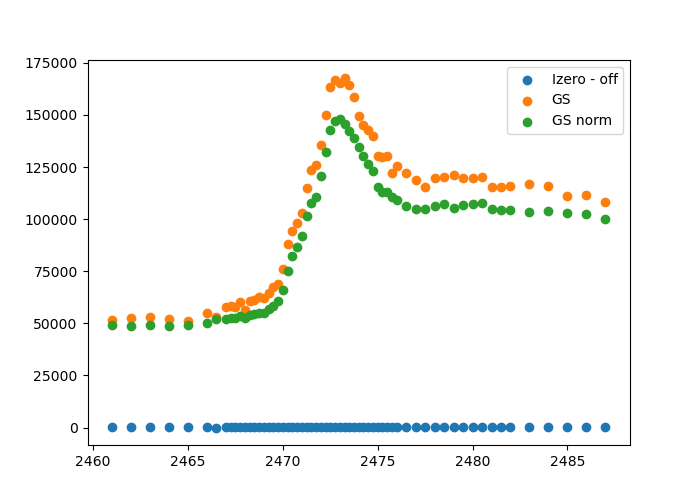

In [6]:
GS = unpump_1_raw
GS = unpump_1_raw#/np.nanmean(np.array(unpump_1_raw))

ordered = np.argsort(np.asarray(energypad))
peaks, what = find_peaks(np.diff(np.array(energypad)[ordered]))

Izero_unpump = np.array(Izero_unpump)[ordered]

starts = np.append(0, peaks)
ends = np.append(peaks, None)

I0u = []
G = []

for s, e in zip(starts, ends):
    Izero = Izero_unpump[s:e]
    GSs = GS[s:e]
    I0u.append(np.mean(Izero))
    G.append(np.mean(GSs))

plt.figure(figsize=(7,5))
#plt.suptitle(titlestring_stack+' -- 1 diode')
#plt.scatter (energy, Izero_pump, label='Izero - off', s=0.5)
plt.scatter(readbacks, I0u, label='Izero - off')
plt.scatter(readbacks, np.array(G), label='GS')
plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS norm')
plt.legend(loc='best')
plt.show()

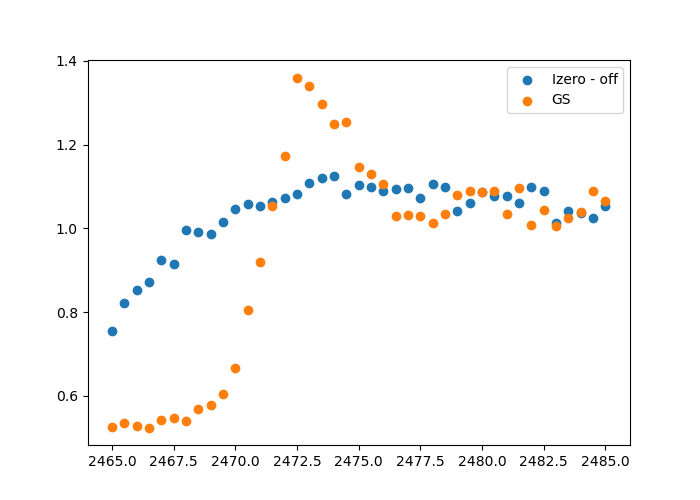

In [15]:
GS = unpump_1

ordered = np.argsort(np.asarray(energypad))
peaks, what = find_peaks(np.diff(np.array(energypad)[ordered]))

Izero_unpump = np.array(Izero_unpump)[ordered]

starts = np.append(0, peaks)
ends = np.append(peaks, None)

I0u = []
G = []

for s, e in zip(starts, ends):
    Izero_p = Izero_pump[s:e]
    GSs = GS[s:e]
    I0u.append(np.mean(Izero_p))
    G.append(np.mean(GSs))

plt.figure(figsize=(7,5))
#plt.suptitle(titlestring_stack+' -- 1 diode')
#plt.scatter (energy, Izero_pump, label='Izero - off', s=0.5)
plt.scatter(readbacks, I0u, label='Izero - off')
plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS')
#plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS norm')
plt.legend(loc='best')
plt.show()

# TEST

In [7]:
import numpy as np
test = np.load("p22588/Reduced_data/run0104-PtLQ_timescan_lxt_2473p5eV_0p5uJ/run_array.npy", allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'p22588/Reduced_data/run0104-PtLQ_timescan_lxt_2473p5eV_0p5uJ/run_array.npy'

In [6]:
pwd

'/das/work/p22/p22588/alvra_beamline_scripts'